In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
def draw_acoutputpower_linechart(filename):
    
    with sqlite3.connect(filename) as con:
        df = pd.read_sql('''select * from inverter_minutely''', con=con)

    df.LoggedDatetime = pd.to_datetime(df.LoggedDatetime)

    fig, ax = plt.subplots(1)

    dfs = {}
    device_identifies = [1,2,3,4,5,18,19]
    for id in device_identifies:
        cmd = 'DeviceID == {}'.format(id)
        dfs[id] = df.query(cmd)


    for id in device_identifies:
        df = dfs.get(id)
        ax.plot(df.LoggedDatetime, df.ACOutputPower)

    ax.set_title(filename)
        
    fields = filename.split('.')
    filename2 = '{}.png'.format(fields[0])

    fig.savefig(filename2)
    return filename2

.png


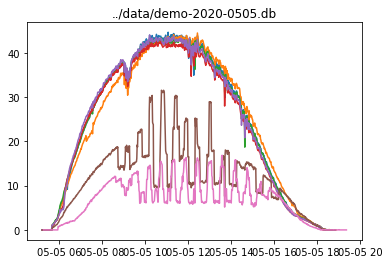

In [3]:
ret = draw_acoutputpower_linechart('../data/demo-2020-0505.db')
print(ret)